In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

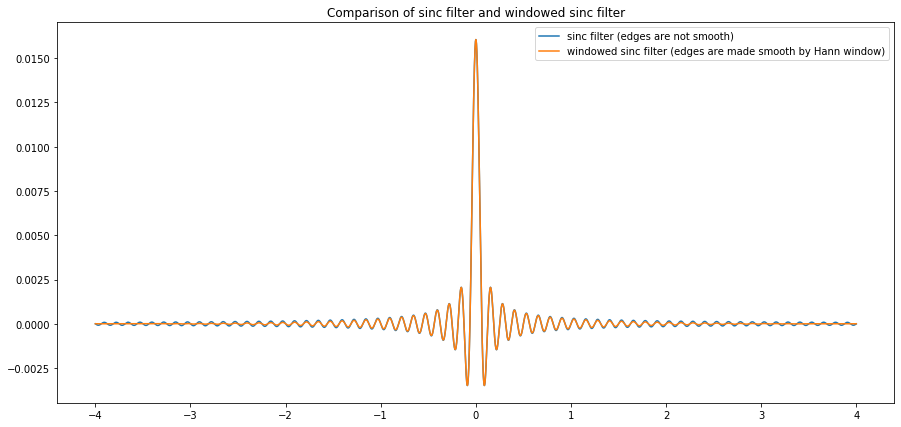

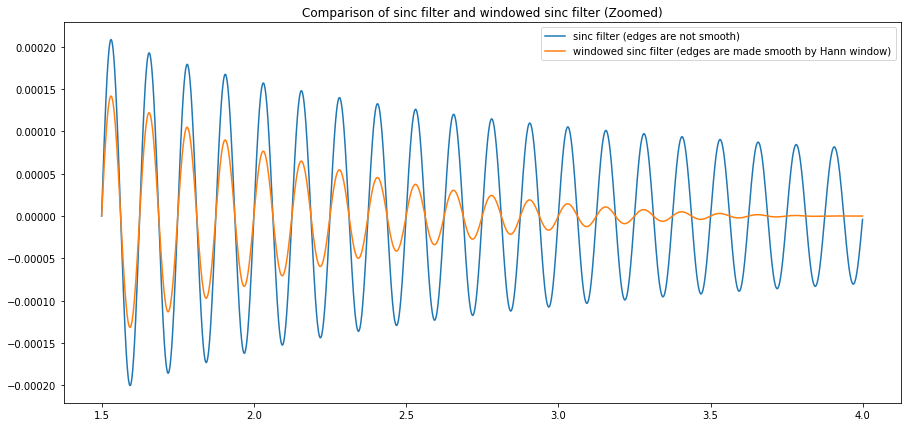

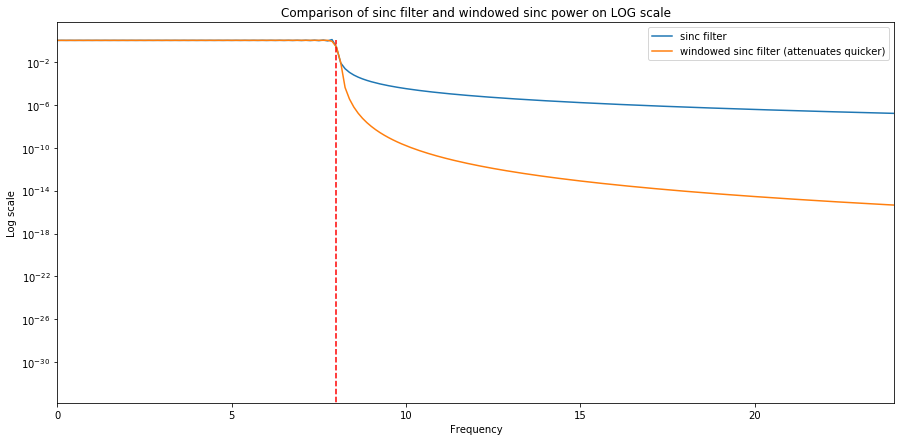

In [20]:
sample_rate = 1000
time_axis = np.arange(-4, 4, 1 / sample_rate)
n_filter = len(time_axis)  # order

frequency_cutoff = 8  # Hz
sinc_filter = np.sin(2 * np.pi * frequency_cutoff * time_axis) / time_axis  # at time 0 there is a zero division

# adjusting filter so there are no NaN values after division by zero
sinc_filter[~np.isfinite(sinc_filter)] = np.max(sinc_filter)
# Normalization to unit-gain
sinc_filter /= sum(sinc_filter)

# Windowing by Hanning window
sinc_filter_windowed = sinc_filter * np.hanning(n_filter)

plt.figure(figsize=(15, 7))
plt.plot(time_axis, sinc_filter, label='sinc filter (edges are not smooth)')
plt.plot(time_axis, sinc_filter_windowed, label='windowed sinc filter (edges are made smooth by Hann window)')
plt.legend()
plt.title('Comparison of sinc filter and windowed sinc filter')
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(time_axis[-2500:], sinc_filter[-2500:], label='sinc filter (edges are not smooth)')
plt.plot(time_axis[-2500:], sinc_filter_windowed[-2500:],
         label='windowed sinc filter (edges are made smooth by Hann window)')
plt.legend()
plt.title('Comparison of sinc filter and windowed sinc filter (Zoomed)')
plt.show()

# Power spectrum
sinc_filter_power = abs(np.fft.fft(sinc_filter)) ** 2
sinc_filter_windowed_power = abs(np.fft.fft(sinc_filter_windowed)) ** 2
hz_axis_filter = np.linspace(0, sample_rate / 2, int(np.floor(n_filter / 2) + 1))

plt.figure(figsize=(15, 7))
plt.plot(hz_axis_filter, sinc_filter_power[:len(hz_axis_filter)], label='sinc filter')
plt.plot(hz_axis_filter, sinc_filter_windowed_power[:len(hz_axis_filter)],
         label='windowed sinc filter (attenuates quicker)')
plt.plot([frequency_cutoff, frequency_cutoff], [0, 1], 'r--')
# To display big and small values on similar scale, log scale is used
plt.yscale('log')
plt.ylabel('Log scale')
plt.xlabel('Frequency')
plt.xlim([0, frequency_cutoff * 3])
plt.legend()
plt.title('Comparison of sinc filter and windowed sinc power on LOG scale')
plt.show()


# Applying windowed sinc to raw signal

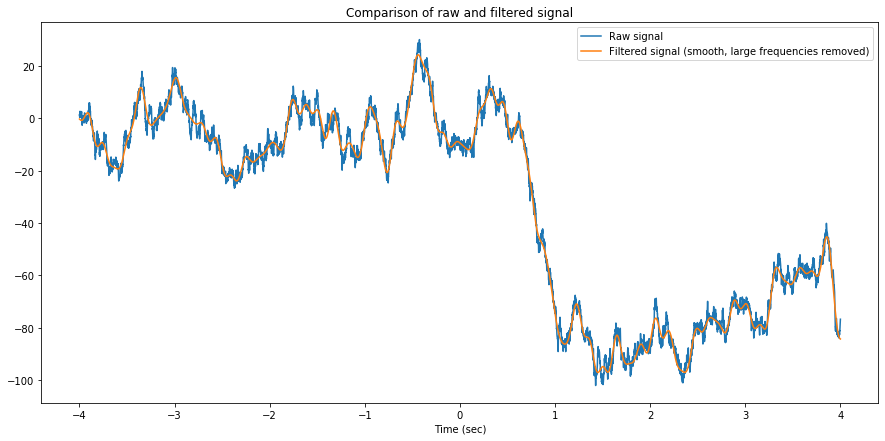

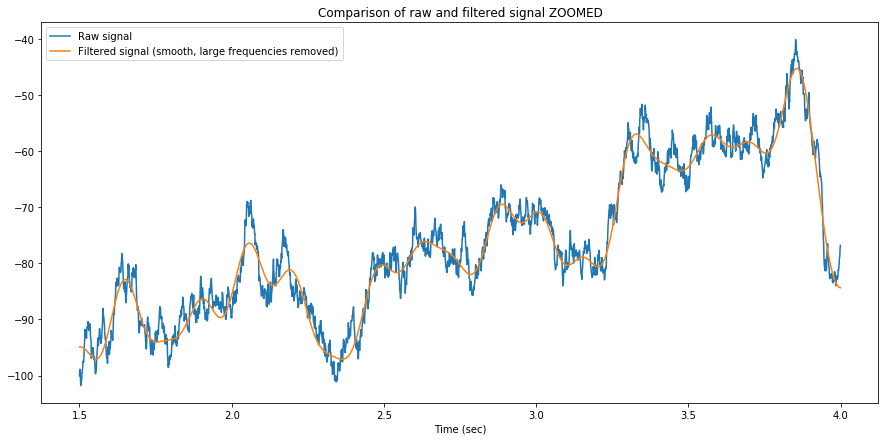

Text(0.5, 1.0, 'Comparison of raw and filtered signal powers on LOG scale')

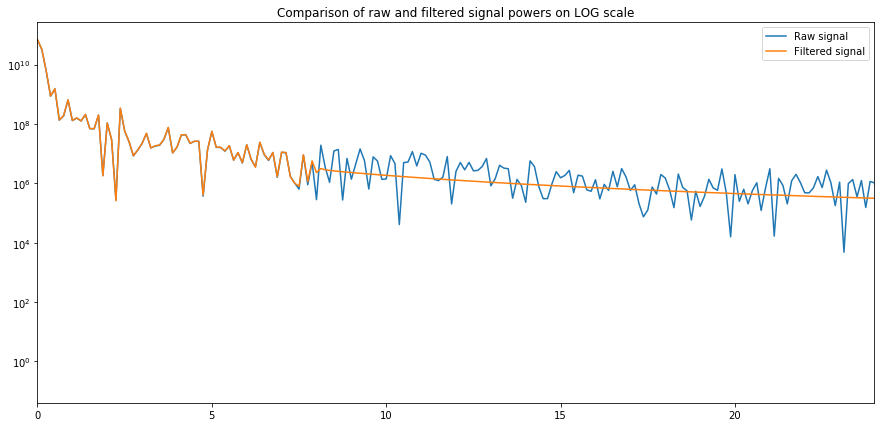

In [51]:
# APPLYING WINDOWED SINC FILTER TO RWA SIGNAL

# Generating data
raw_signal = np.cumsum(np.random.randn(n_filter))
raw_signal_reflected = np.concatenate([raw_signal, np.flip(raw_signal)], axis=0)

# Reflection of signal to deal with edge effects
filtered_signal = signal.lfilter(sinc_filter_windowed, 1, raw_signal_reflected)
filtered_signal = np.flip(filtered_signal)
filtered_signal = signal.lfilter(sinc_filter_windowed, 1, filtered_signal)
filtered_signal = np.flip(filtered_signal)
filtered_signal = filtered_signal[:n_filter]

plt.figure(figsize=(15, 7))
plt.plot(time_axis, raw_signal, label='Raw signal')
plt.plot(time_axis, filtered_signal, label='Filtered signal (smooth, large frequencies removed)')
plt.xlabel('Time (sec)')
plt.legend()
plt.title('Comparison of raw and filtered signal')
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(time_axis[-2500:], raw_signal[-2500:], label='Raw signal')
plt.plot(time_axis[-2500:], filtered_signal[-2500:], label='Filtered signal (smooth, large frequencies removed)')
plt.xlabel('Time (sec)')
plt.legend()
plt.title('Comparison of raw and filtered signal ZOOMED')
plt.show()

# Power spectrum of signals
raw_signal_power = abs(np.fft.fft(raw_signal)) ** 2
filtered_signal_power = abs(np.fft.fft(filtered_signal)) ** 2
hz_axis = np.linspace(0, sample_rate / 2, int(np.floor(n_filter / 2) + 1))

plt.figure(figsize=(15, 7))
plt.plot(hz_axis, raw_signal_power[:len(hz_axis)], label='Raw signal')
plt.plot(hz_axis, filtered_signal_power[:len(hz_axis)], label='Filtered signal')
plt.yscale('log')
plt.xlim([0, frequency_cutoff * 3])
plt.legend()
plt.title('Comparison of raw and filtered signal powers on LOG scale')

# Comparison of different windowing functions


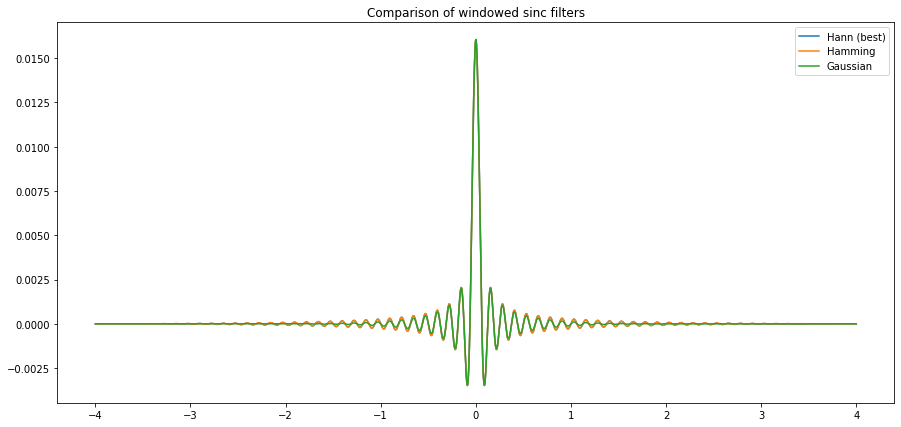

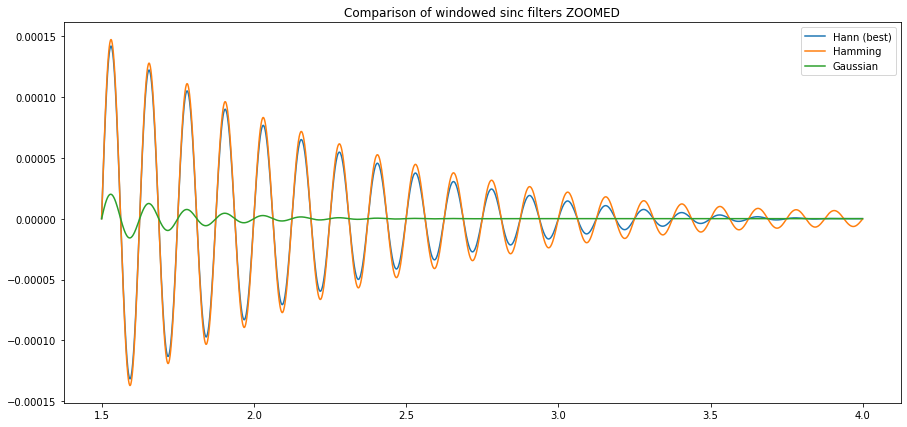

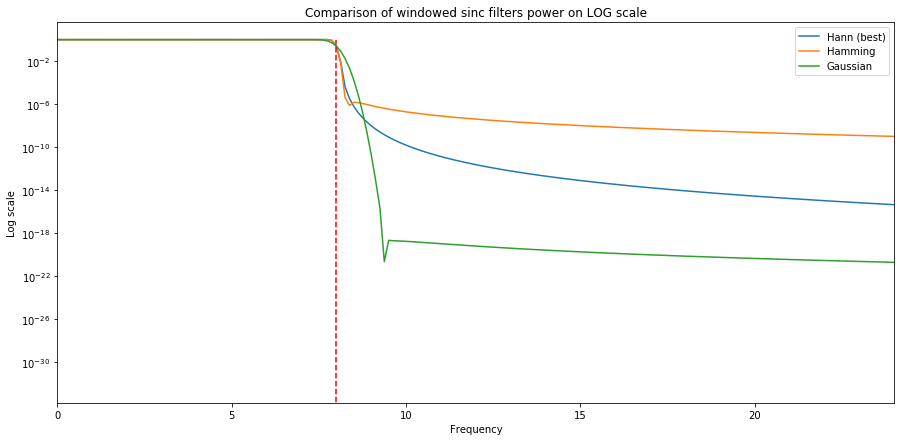

In [56]:
# COMPARISON OF DIFFERENT WINDOWED FUNCTIONS

windowing_function_names = ['Hann (best)', 'Hamming', 'Gaussian']
sinc_filters_windowed = [sinc_filter * np.hanning(n_filter),
                         sinc_filter * np.hamming(n_filter),
                         sinc_filter * np.exp(-time_axis ** 2)]

plt.figure(figsize=(15, 7))
for i in range(3):
    plt.plot(time_axis, sinc_filters_windowed[i], label=windowing_function_names[i])
    plt.legend()
plt.title('Comparison of windowed sinc filters')
plt.show()

plt.figure(figsize=(15, 7))
for i in range(3):
    plt.plot(time_axis[-2500:], sinc_filters_windowed[i][-2500:], label=windowing_function_names[i])
    plt.legend()
plt.title('Comparison of windowed sinc filters ZOOMED')
plt.show()

# Power spectrum
plt.figure(figsize=(15, 7))
for i in range(3):
    sinc_filter_power = abs(np.fft.fft(sinc_filters_windowed[i])) ** 2
    plt.plot(hz_axis_filter, sinc_filter_power[:len(hz_axis_filter)], label=windowing_function_names[i])
plt.plot([frequency_cutoff, frequency_cutoff], [0, 1], 'r--')
# To display big and small values on similar scale, log scale is used
plt.yscale('log')
plt.ylabel('Log scale')
plt.xlabel('Frequency')
plt.xlim([0, frequency_cutoff * 3])
plt.legend()
plt.title('Comparison of windowed sinc filters power on LOG scale')
plt.show()



Text(0.5, 1.0, 'Windows comparison')

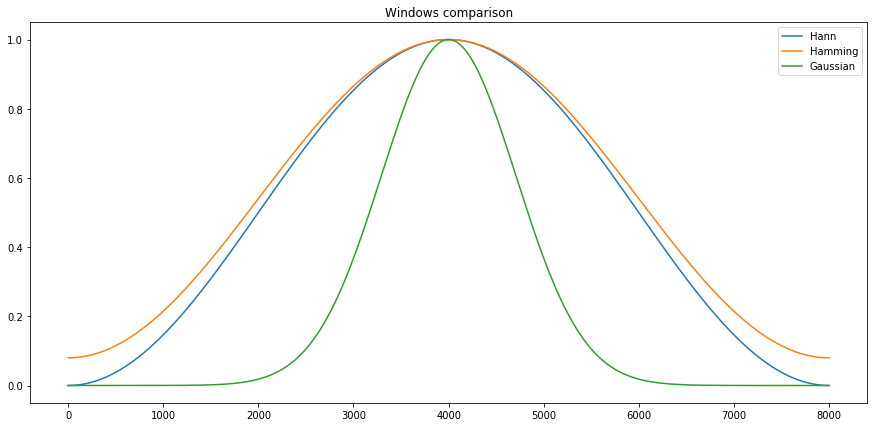

In [58]:
plt.figure(figsize=(15, 7))
plt.plot(np.hanning(n_filter), label='Hann')
plt.plot(np.hamming(n_filter), label='Hamming')
plt.plot(np.exp(-time_axis**2), label='Gaussian')
plt.legend()
plt.title('Windows comparison')